<a href="https://colab.research.google.com/github/Akowsor15/TechyA/blob/main/AI_Society_Heart_Disease_Prediction_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart disease prediction

Being a part of the AI society we have learned what is Github and where we can store our files. Not only that but i am able to create datasets and test datasets to see if codes work or run smoothly.

#Importing the libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#Reading the data

In [7]:
data= pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')

In [8]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#importing the data information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


#Data Visualization

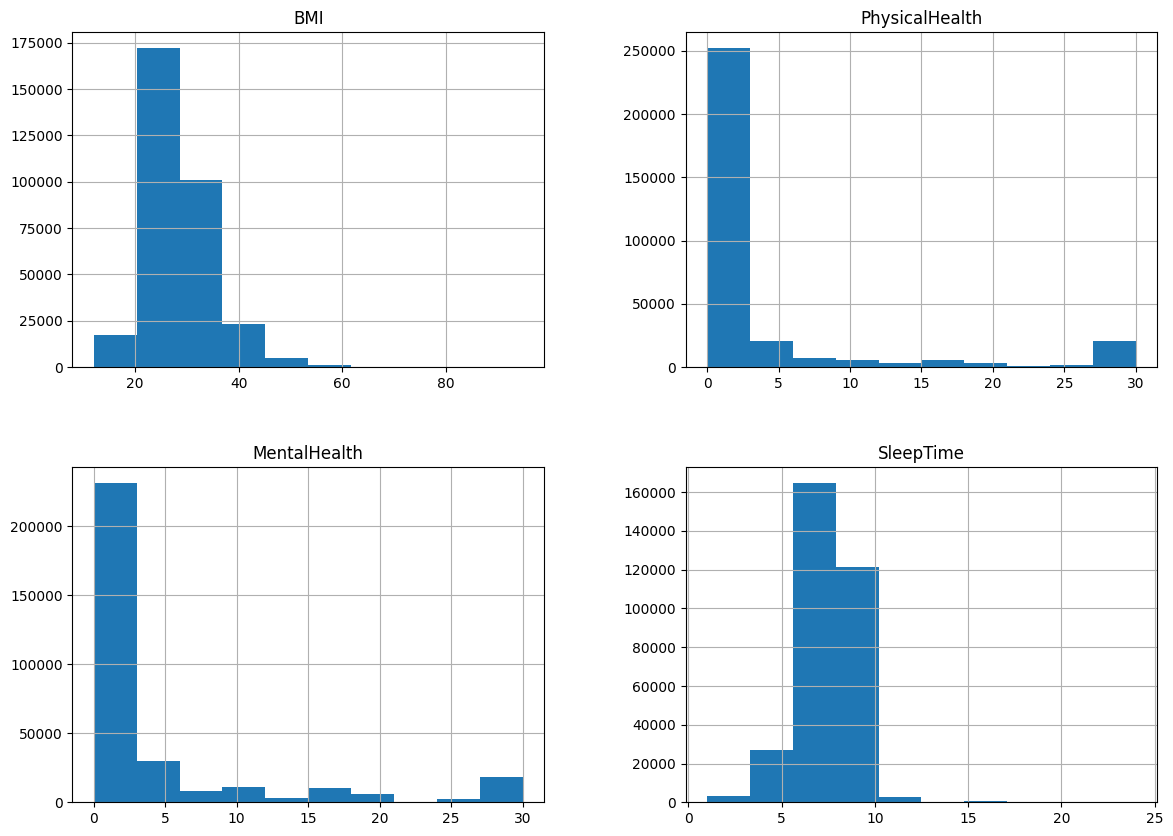

In [11]:
data.hist(bins = 10 , figsize= (14,10))
plt.show()

In [12]:
fig = px.pie(data,names='Smoking',title='Smoking',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

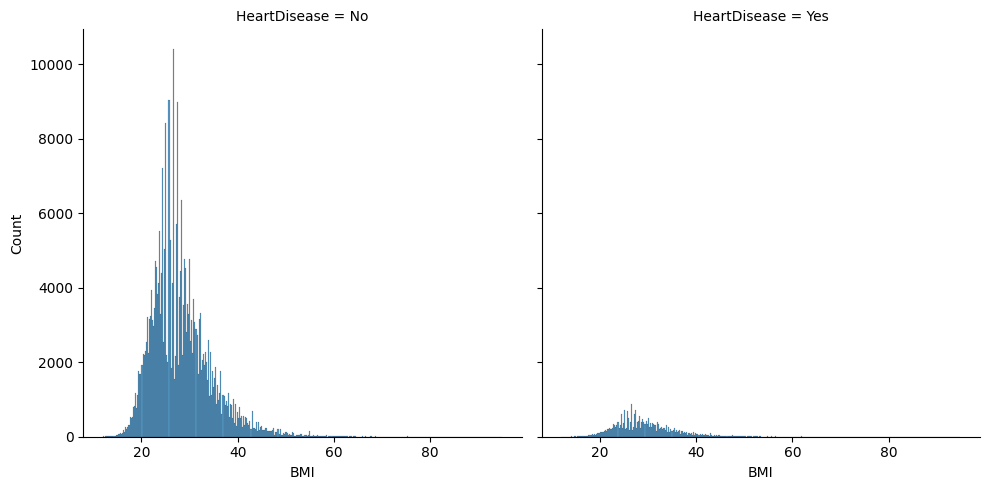

In [13]:
sns.displot(data, x="BMI", col="HeartDisease")

#Showing data that contains null

In [14]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [15]:
data['HeartDisease'].value_counts()/data.shape[0]

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

<Axes: xlabel='HeartDisease', ylabel='count'>

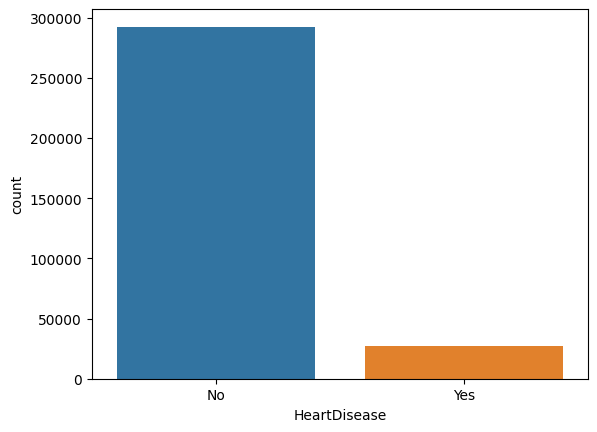

In [16]:
sns.countplot(x=data["HeartDisease"])

In [17]:
df=data.copy()

#Random resampling

In [18]:
# class count
count_class_no, count_class_yes = df['HeartDisease'].value_counts()

# divide the class
df_class_yes = df[df['HeartDisease'] == 'Yes']
df_class_no = df[df['HeartDisease'] == 'No']

Random under-sampling
No     27373
Yes    27373
Name: HeartDisease, dtype: int64


<Axes: title={'center': 'Count (HeartDisease)'}>

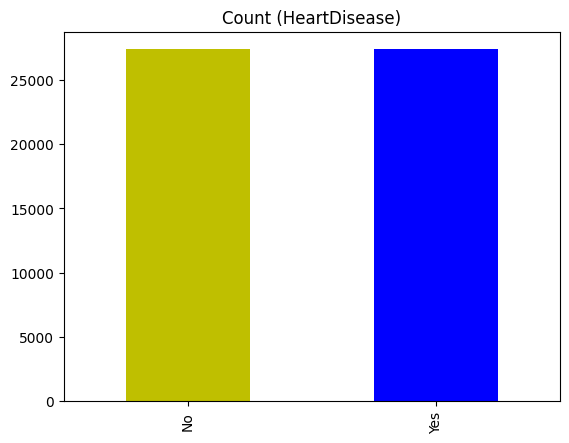

In [19]:
df_class_no_under = df_class_no.sample(count_class_yes)
df_test_under = pd.concat([df_class_no_under, df_class_yes], axis=0)

print('Random under-sampling')
print(df_test_under['HeartDisease'].value_counts())
df_test_under['HeartDisease'].value_counts().plot(kind='bar', title='Count (HeartDisease)', color=['y', 'b'])

#Random oversampling

Random over-sampling
No     292422
Yes    292422
Name: HeartDisease, dtype: int64


<Axes: title={'center': 'Count (HeartDisease)'}>

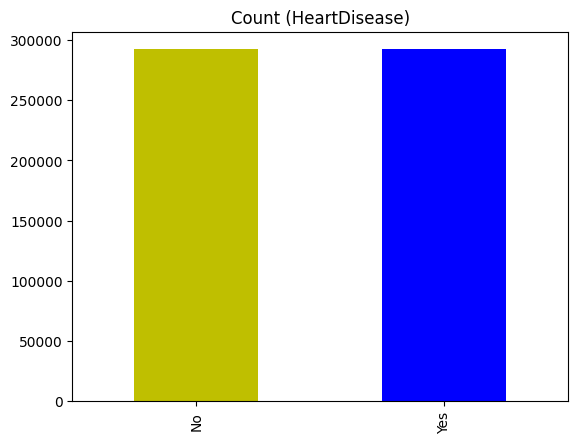

In [20]:
df_class_yes_over = df_class_yes.sample(count_class_no, replace=True)
df_test_over = pd.concat([df_class_no, df_class_yes_over], axis=0)

print('Random over-sampling')
print(df_test_over['HeartDisease'].value_counts())

df_test_over['HeartDisease'].value_counts().plot(kind='bar', title='Count (HeartDisease)', color=['y', 'b'])

#Random undersampling from imblearn

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

under_sampler = RandomUnderSampler(sampling_strategy=0.5)
x = df.iloc[:, 1:]
y = df['HeartDisease']
x_under, y_under = under_sampler.fit_resample(x, y)

print(f'Before undersampling: {Counter(df["HeartDisease"])}')
print(f'After undersampling: {Counter(y_under)}')

Before undersampling: Counter({'No': 292422, 'Yes': 27373})
After undersampling: Counter({'No': 54746, 'Yes': 27373})


#Random oversampling from imblearn

In [22]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy='minority')

x_over, y_over = over_sampler.fit_resample(x, y)

print(f'Before oversampling: {Counter(df["HeartDisease"])}')
print(f'After oversampling: {Counter(y_over)}')

Before oversampling: Counter({'No': 292422, 'Yes': 27373})
After oversampling: Counter({'No': 292422, 'Yes': 292422})


#Undersampling Tomek links

In [23]:
from imblearn.under_sampling import TomekLinks

under_sampler = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_over, y_over = over_sampler.fit_resample(x, y)

print(f'Before oversampling: {Counter(df["HeartDisease"])}')
print(f'After oversampling: {Counter(y_over)}')

Before oversampling: Counter({'No': 292422, 'Yes': 27373})
After oversampling: Counter({'No': 292422, 'Yes': 292422})


#Encoding the dataset

In [24]:
df.describe(include=object)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

#Train, test and split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x=df.drop('HeartDisease',axis=1).values
y=df['HeartDisease'].values

In [30]:
x_train ,x_test ,y_train ,y_test=train_test_split(x,y ,test_size=0.25,random_state=42)

#smote

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)

In [33]:
x_train ,x_test ,y_train ,y_test=train_test_split(X_res, y_res  ,test_size=0.25,random_state=42)

#Modelling, Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features=4)

In [36]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=5)

In [37]:
rf.score(x_train , y_train)

0.7492961085919209

In [38]:
rf.score(x_test , y_test)

0.7471462475463543

#Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(penalty='l2' , C=0.5)

In [41]:
lr.fit(x_train , y_train )

LogisticRegression(C=0.5)

In [42]:
lr.score(x_train , y_train)

0.7563954376437705

In [43]:
lr.score(x_test , y_test )

0.7550868265725561

#Gaussian MB

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gnb = GaussianNB()

In [46]:
gnb.fit(x_train,y_train)

GaussianNB()

In [47]:
gnb.score(x_train,y_train)

0.708341597645412

In [48]:
gnb.score(x_test,y_test)

0.7061985760305313